In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Histogram

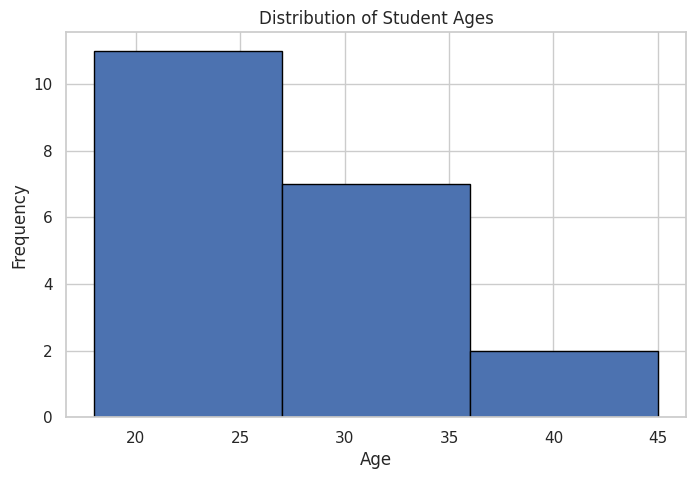

In [6]:
import matplotlib.pyplot as plt

ages = [18, 19, 21, 22, 22, 23, 24, 25, 25, 25,
        26, 27, 27, 28, 30, 32, 33, 35, 40, 45]

plt.figure(figsize=(8,5))

plt.hist(ages, bins=3, edgecolor='black')


plt.title("Distribution of Student Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()


## Pivot Table

In [7]:
import pandas as pd

data = {
    "City": ["Tehran", "Tehran", "Tehran", "Isfahan", "Isfahan", "Shiraz", "Shiraz", "Shiraz"],
    "Product": ["A", "B", "A", "A", "B", "B", "B","A"],
    "Year": [2023, 2023, 2024, 2023, 2024, 2023, 2024,2025],
    "Sales": [1200, 1500, 1800, 900, 1300, 1100, 1600,680]
}

df = pd.DataFrame(data)

pivot = df.pivot_table(
    values="Sales",
    index="City",
    columns="Year",
    aggfunc="sum"
)

print(pivot)


Year       2023    2024   2025
City                          
Isfahan   900.0  1300.0    NaN
Shiraz   1100.0  1600.0  680.0
Tehran   2700.0  1800.0    NaN


In [3]:
data = {
    "City": ["Tehran", "Tehran", "Tehran", "Isfahan", "Isfahan", "Shiraz", "Shiraz"],
    "Product": ["A", "B", "A", "A", "B", "B", "B"],
    "Year": [2023, 2023, 2024, 2023, 2024, 2023, 2024],
    "Sales": [1200, 1500, 1800, 900, 1300, 1100, 1600]
}

df = pd.DataFrame(data)

pivot2 = df.pivot_table(
    values="Sales",
    index=["City", "Product"],
    columns="Year",
    aggfunc="sum"
)

print(pivot2)

Year               2023    2024
City    Product                
Isfahan A         900.0     NaN
        B           NaN  1300.0
Shiraz  B        1100.0  1600.0
Tehran  A        1200.0  1800.0
        B        1500.0     NaN


Year               2023    2024
City    Product                
Isfahan Laptop      NaN  1300.0
        Mobile    900.0     NaN
Shiraz  Laptop   1100.0  3200.0
Tehran  Mobile   2400.0     NaN


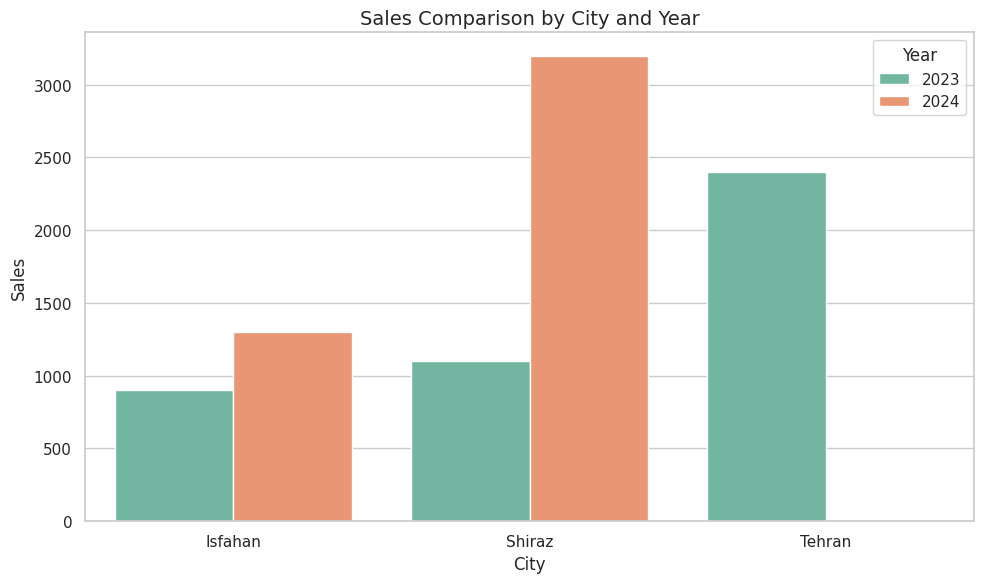

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "City":    ["Tehran","Tehran","Isfahan","Isfahan","Shiraz","Shiraz","Shiraz"],
    "Product": ["Mobile","Mobile","Mobile","Laptop","Laptop","Laptop","Laptop"],
    "Year":    [2023,2023, 2023,2024, 2023,2024,2024],
    "Sales":   [1200,1200, 900,1300, 1100,1600,1600]
}


df = pd.DataFrame(data)


pivot2 = df.pivot_table(
    values="Sales",
    index=["City", "Product"],
    columns="Year",
    aggfunc="sum"
)

print(pivot2)

sns.set_theme(style="whitegrid")

pivot_reset = pivot2.reset_index().melt(
    id_vars=["City", "Product"],
    var_name="Year",
    value_name="Sales"
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=pivot_reset,
    x="City",
    y="Sales",
    hue="Year",
    palette="Set2"
)

plt.title("Sales Comparison by City and Year", fontsize=14)
plt.xlabel("City")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


## Heatmap

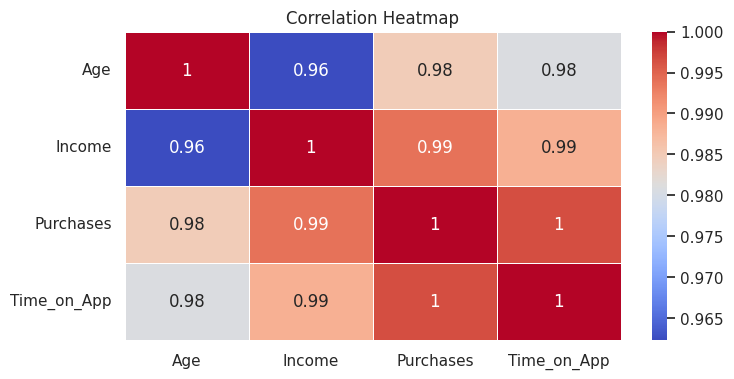

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  data
data = {
    "Age": [22, 25, 27, 30, 35, 40],
    "Income": [4.1, 5.0, 6.3, 7.5, 8.0, 9.0],
    "Purchases": [2, 3, 4, 5, 6, 7],
    "Time_on_App": [15, 22, 26, 30, 35, 40]
}

# dataframe
df = pd.DataFrame(data)

# Correlation Matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Titanic Histogram

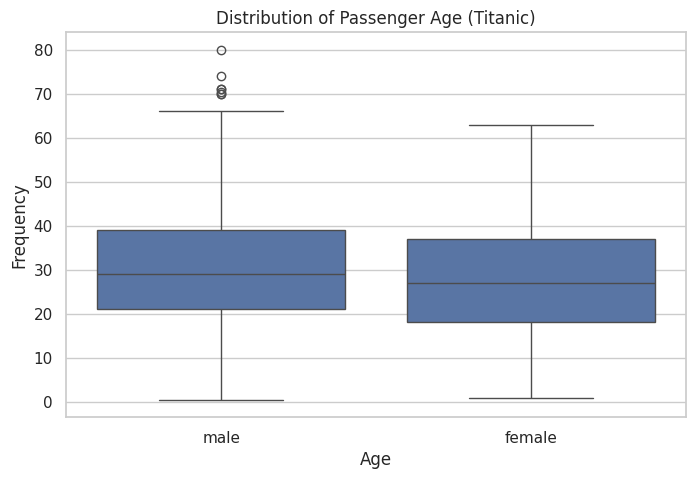

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
plt.figure(figsize=(8,5))
# sns.histplot(data=titanic, x="age", bins=30, kde=True, color="steelblue")
sns.boxplot(data=titanic,x="sex",y="age")
plt.title("Distribution of Passenger Age (Titanic)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


### Age histogram comparison between male and female (Seaborn + Hue)

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(
    data=titanic,
    x="age",
    hue="sex",
    element="step",
    bins=30,
    kde=True
)




plt.title("Age Distribution by Gender (Titanic)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


### Multi-feature histogram side by side (FacetGrid)

In [ ]:
iris = sns.load_dataset("iris")

g = sns.FacetGrid(iris, col="species", height=4)
g.map_dataframe(sns.histplot, x="petal_length", bins=20, kde=True)

plt.show()

### Comparing multiple columns in a figure (Matplotlib Subplots)

In [ ]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

plt.figure(figsize=(10,8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(iris[col], bins=20, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()
